In [2]:
import os.path
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/yvonne/miniconda3/envs/edaf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!pwd

/home/yvonne/Desktop/docking_result/5.dna_pli


In [4]:
root_folder = "/home/yvonne/Desktop/docking_result/5.dna_pli/"
fig_root = '/home/yvonne/Desktop/docking_result/mdanalysis/All_figures/'
csv_files = glob.glob(root_folder + '*.csv')

In [5]:
csv_files

['/home/yvonne/Desktop/docking_result/5.dna_pli/h5_guanA.csv',
 '/home/yvonne/Desktop/docking_result/5.dna_pli/h5_hybrid.csv']

In [6]:
# Create an empty list to store the dataframes
dfs = []

# Load and append each CSV file to the list of dataframes
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Merge the dataframes based on "resname"
merged_df = pd.merge(dfs[0], dfs[1], on="resname", how="outer")

# Merge additional dataframes if present
if len(dfs) > 2:
    for i in range(2, len(dfs)):
        merged_df = pd.merge(merged_df, dfs[i], on="resname", how="outer")

merged_df


,resname,"g_dnab.pdb,1","h_dnaa.pdb,1"
0,MGB/1/MG,-0.229479,NaN
1,MGB/2/MG,0.351932,NaN
2,TRXA/1/MET,0.000000,0.000000
3,TRXA/2/SER,0.000000,0.000000
4,TRXA/3/GLU,0.000000,0.000000
...,...,...,...
235,TRXA/234/LEU,0.000000,0.000000
236,TRXA/235/GLU,0.000000,0.000000
237,TRXA/236/ALA,0.000000,0.000000
238,MGA/1/MG,NaN,-0.116048


In [7]:
merged_df.fillna(0, inplace=True)



In [11]:
combine_df = merged_df.set_index(merged_df.columns[0])
combine_df

,"g_dnab.pdb,1","h_dnaa.pdb,1"
resname,,
MGB/1/MG,-0.229479,0.000000
MGB/2/MG,0.351932,0.000000
TRXA/1/MET,0.000000,0.000000
TRXA/2/SER,0.000000,0.000000
TRXA/3/GLU,0.000000,0.000000
...,...,...
TRXA/234/LEU,0.000000,0.000000
TRXA/235/GLU,0.000000,0.000000
TRXA/236/ALA,0.000000,0.000000


In [12]:
zero = combine_df.loc[(combine_df !=0).any(1)]
zero

,"g_dnab.pdb,1","h_dnaa.pdb,1"
resname,,
MGB/1/MG,-0.229479,0.000000
MGB/2/MG,0.351932,0.000000
TRXA/13/LEU,-0.024383,-0.015704
TRXA/14/ASP,0.632537,0.285408
TRXA/15/LEU,-0.473132,-0.237142
...,...,...
TRXA/196/THR,-0.006551,0.000000
TRXA/197/LEU,-0.003439,0.000000
TRXA/225/MET,-0.013465,-0.013090


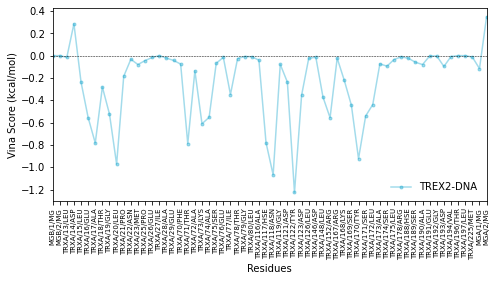

In [13]:
fz = 7
fig, ax = plt.subplots(figsize=(7,4))
plt.plot(zero['h_dnaa.pdb,1'], label='TREX2-DNA', color='#19A7CE', marker='.', alpha=0.4)

ax.set_xlabel("Residues", fontsize = 10)
ax.set_ylabel("Vina Score (kcal/mol)", fontsize = 10)
ax.axhline(0.0, color='k', linestyle='dashed', linewidth=0.5)
plt.xticks(rotation=90, fontsize = fz)
plt.legend(loc = 4, fontsize = 10, fancybox = False, frameon = False)
# ax.grid(axis='x')
plt.xlim("MGB/1/MG","MGA/2/MG")

plt.tight_layout()   
plt.savefig(f"{fig_root}hybrid.png", dpi = 300, bbox_inches='tight')
plt.show()


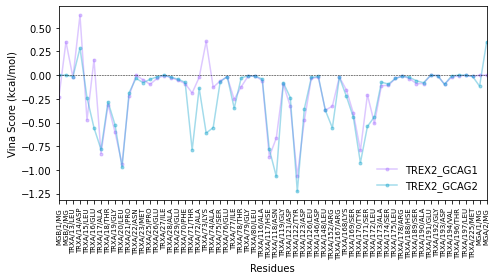

In [83]:
fz = 7
fig, ax = plt.subplots(figsize=(7,4))

color_map = ['#AA77FF','#19A7CE'] # 'orange'
names = ['TREX2_GCAG1', 'TREX2_GCAG2']

# Reverse the order of columns in df_zeroless
# reversed_columns = zero.columns[::-1]

for i, col in enumerate(zero.columns):
    name = names[i % len(names)]
    color = color_map[i % len(color_map)] 
    plt.plot(zero[col], label=name, color=color, marker='.', alpha=0.4)#marker = 'h'

ax.set_xlabel("Residues", fontsize = 10)
ax.set_ylabel("Vina Score (kcal/mol)", fontsize = 10)
ax.axhline(0.0, color='k', linestyle='dashed', linewidth=0.5)
plt.xticks(rotation=90, fontsize = fz)
plt.legend(loc = 4, fontsize = 10, fancybox = False, frameon = False)
# ax.grid(axis='x')
plt.xlim("MGB/1/MG","MGA/2/MG")

# Set the y-axis ticks every -0.2 starting from 0 to -2.0
# ticks = np.arange(0, -2.2, -0.25)
# ax.set_yticks(ticks)

# Format the y-axis tick labels as strings
# ticklabels = [str(f'{tick:.2f}') for tick in ticks]
# ax.set_yticklabels(ticklabels)

plt.tight_layout()   
plt.savefig(f"{fig_root}dna_compare.png", dpi = 300, bbox_inches='tight')
plt.show()



In [14]:
# Initialize an empty list to hold the DataFrames
dfs = []

# Loop through the CSV files and read each one into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all of the DataFrames into a single DataFrame
combined_df = pd.concat(dfs, axis=1)

combined_df = pd.merge(dfs[0], on='resname')
for df in dfs[1:]:
    combined_df = pd.merge(combined_df, df, on='resname')

combined_df

,resname,"g_dnab.pdb,1",resname,"h_dnaa.pdb,1"
0,MGB/1/MG,-0.229479,TRXA/1/MET,0.000000
1,MGB/2/MG,0.351932,TRXA/2/SER,0.000000
2,TRXA/1/MET,0.000000,TRXA/3/GLU,0.000000
3,TRXA/2/SER,0.000000,TRXA/4/PRO,0.000000
4,TRXA/3/GLU,0.000000,TRXA/5/PRO,0.000000
...,...,...,...,...
233,TRXA/232/PRO,0.000000,TRXA/234/LEU,0.000000
234,TRXA/233/SER,0.000000,TRXA/235/GLU,0.000000
235,TRXA/234/LEU,0.000000,TRXA/236/ALA,0.000000
236,TRXA/235/GLU,0.000000,MGA/1/MG,-0.116048


In [35]:
# Remove columns with duplicated names
combined_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
combined_df.fillna(0, inplace=True)


In [31]:
combined_df = combined_df.set_index(combined_df.columns[0])
combined_df

AttributeError: 'NoneType' object has no attribute 'set_index'

In [32]:
df_zeroless = combined_df.loc[(combined_df !=0).any(1)]
# C = 'c'
# df_zeroless = df_zeroless.rename(columns={'g_dnab.pdb,1':"TREX2A-3'overhang", 'g_dnaa.pdb,1': "TREX2B-3'overhang",'h_dnaa.pdb,1': 'TREX2A-Y-structured DNA'})
# df_zeroless.to_csv(root_folder + f"allframes_zeroless2.csv")
# a = df_zeroless.drop("TREX2B-3'overhang", axis = 1, inplace = False)


AttributeError: 'NoneType' object has no attribute 'loc'

In [24]:
df_zeroless

,resname,"g_dnab.pdb,1",resname,"h_dnaa.pdb,1"
0,MGB/1/MG,-0.229479,TRXA/1/MET,0.000000
1,MGB/2/MG,0.351932,TRXA/2/SER,0.000000
2,TRXA/1/MET,0.000000,TRXA/3/GLU,0.000000
3,TRXA/2/SER,0.000000,TRXA/4/PRO,0.000000
4,TRXA/3/GLU,0.000000,TRXA/5/PRO,0.000000
...,...,...,...,...
233,TRXA/232/PRO,0.000000,TRXA/234/LEU,0.000000
234,TRXA/233/SER,0.000000,TRXA/235/GLU,0.000000
235,TRXA/234/LEU,0.000000,TRXA/236/ALA,0.000000
236,TRXA/235/GLU,0.000000,MGA/1/MG,-0.116048


In [65]:
# fz = 7
# fig, ax = plt.subplots(figsize=(7,4))


# color_map = ['red','orange','blue'] # 'orange'

# # Reverse the order of columns in df_zeroless
# reversed_columns = df_zeroless.columns[::-1]

# for i, col in enumerate(df_zeroless.columns):
#     color = color_map[i % len(color_map)] 
#     plt.plot(df_zeroless[col], label=col, color=color, marker ='.', alpha = 0.4)#marker = 'h'

# ax.set_xlabel("Residues", fontsize = fz)
# ax.set_ylabel("kcal/mol", fontsize = fz)
# ax.axhline(0.0, color='k', linestyle='dashed', linewidth=0.5)
# plt.xticks(rotation=90, fontsize = fz)
# plt.legend(loc = 4, fontsize = 8, fancybox = False)
# ax.grid(axis='x')
# plt.xlim("TRXA/13/LEU","MGA/2/MG")

# # Set the y-axis ticks every -0.2 starting from 0 to -2.0
# # ticks = np.arange(0, -2.2, -0.25)
# # ax.set_yticks(ticks)

# # Format the y-axis tick labels as strings
# # ticklabels = [str(f'{tick:.2f}') for tick in ticks]
# # ax.set_yticklabels(ticklabels)

# plt.tight_layout()   

# # plt.savefig(f"{fig_root}dna_compare.png", dpi = 300, bbox_inches='tight')
# plt.show()

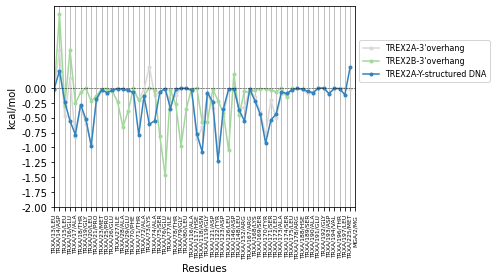

In [19]:
fz = 10
fig, ax = plt.subplots(figsize=(7,4))

# Define a custom color map
# color_map = plt.get_cmap('plasma') #tab10 tab20c prism
color_map = plt.cm.get_cmap('tab20c', len(df_zeroless.columns))
color_map = color_map.reversed()

for i, col in enumerate(df_zeroless.columns):
    color = color_map(i)
    plt.plot(df_zeroless[col], label=col, color=color, marker ='.')#marker = 'h'

ax.set_xlabel("Residues", fontsize = fz)
ax.set_ylabel("kcal/mol", fontsize = fz)
ax.axhline(0.0, color='k', linestyle='dashed', linewidth=0.5)
plt.xticks(rotation=90, fontsize = 6)
plt.legend(bbox_to_anchor=(1, 0.85), fontsize = 8)
ax.grid(axis='x')
plt.xlim("TRXA/13/LEU","MGA/2/MG")

# Set the y-axis ticks every -0.2 starting from 0 to -2.0
ticks = np.arange(0, -2.2, -0.25)
ax.set_yticks(ticks)

# Format the y-axis tick labels as strings
ticklabels = [str(f'{tick:.2f}') for tick in ticks]
ax.set_yticklabels(ticklabels)

plt.tight_layout()   

# plt.savefig(f"{fig_root}dna_compare.png", dpi = 300, bbox_inches='tight')
plt.show()

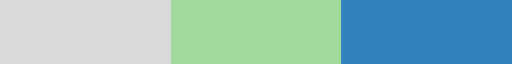

In [23]:
color_map